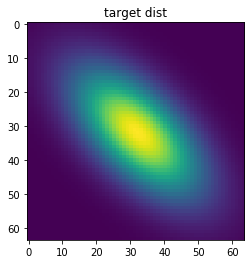

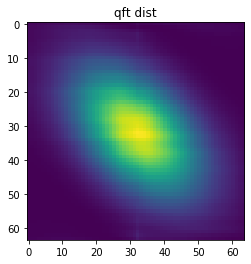

In [2]:
from tqdm.notebook import tqdm

from QFTSampler import Orchestrator
from QFTSampler.ExpTargetDists import Target_gauss2d_dependent
from QFTSampler.transformers import AffineNonLinearBasis, Constant

import matplotlib.pyplot as plt

# NはQFT回路の量子ビット数.乱数の１次元あたりに使うビット数を表す
N = 10
# MはQFT回路の非ゼロqビット数. 作成する分布の周波数を2^Mまでに制限する
M = 4

# ターゲット分布を生成
target = Target_gauss2d_dependent(N=N, M=M, )

# ターゲット分布を学習する機械学習器を生成
# ex) Constant: 定数φを学習する
# ex) AffineNonLinearBasis: φを非線形基底を用いて出力する線形関数を学習する
transformer_list = [Constant(M), AffineNonLinearBasis(N,M)]

# 学習しつつサンプリングするオーケストレーターを作成
orch = Orchestrator(N=N, M=M, transformer_list=transformer_list, target=target)

# 学習しつつサンプリング
for _ in tqdm(range(10000), leave=False):
    probs, samples = orch.step(sample_num=32, lr=1e-2, train=True, loss_func='CE')

# 学習した分布を可視化
pmap = orch.pmap() #ターゲット分布
qmap = orch.qmap() #qftsamplerによる提案分布
plt.title('target dist')
plt.imshow(pmap)
plt.show()
plt.title('qft dist')
plt.imshow(qmap)
plt.show()